In [1]:
import pandas as pd
import torch
import numpy as np
import random
from random import shuffle
np.random.seed(17)
random.seed(17)
torch.manual_seed(17)
import wget
import os
import aiohttp
import asyncio
from fpl import FPL
from torch.utils.data import TensorDataset, DataLoader
from player import Player
from team import Team
from data_processor import get_fpl, get_players, get_teams, get_training_datasets
from matplotlib import pyplot as plt
import seaborn as sns

4


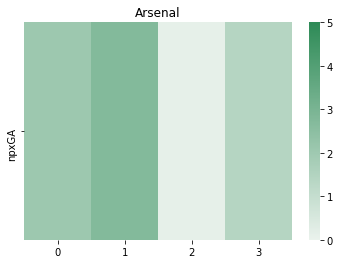

4


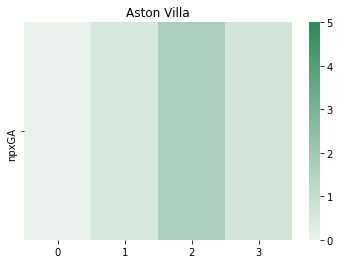

4


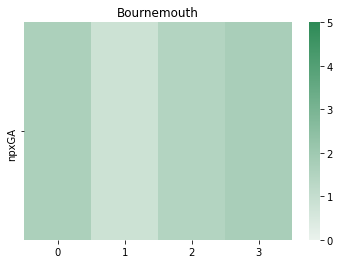

4


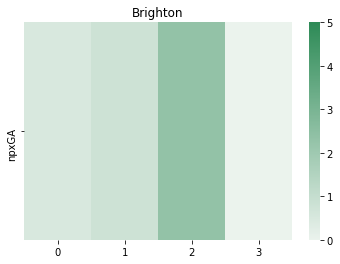

4


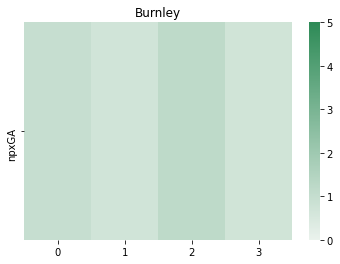

4


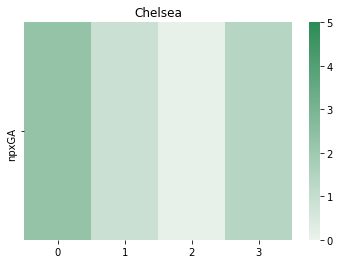

4


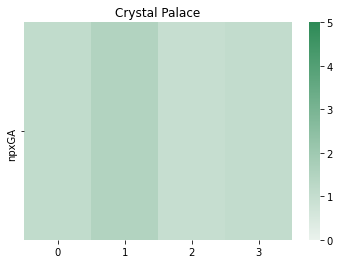

4


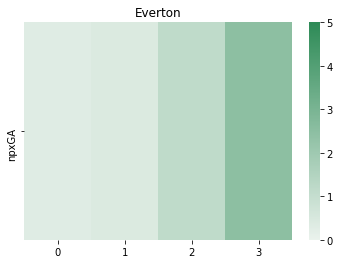

4


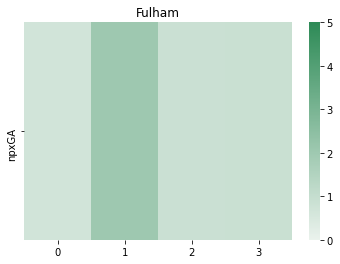

4


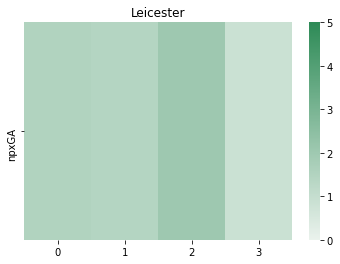

4


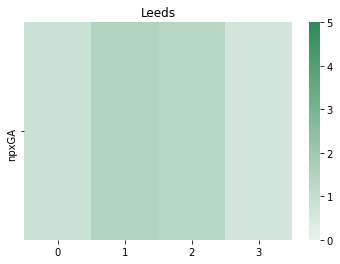

4


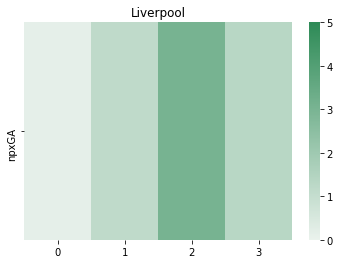

4


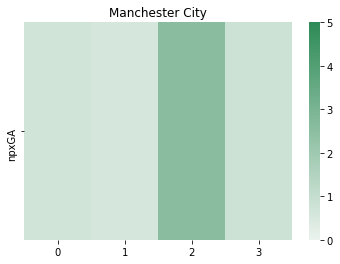

4


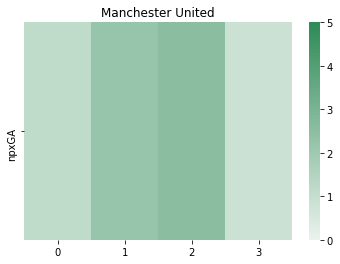

4


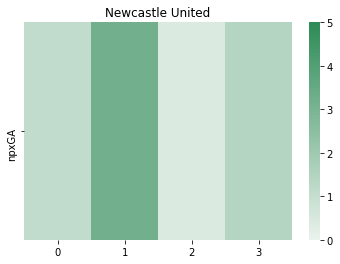

4


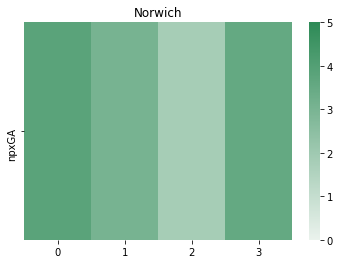

4


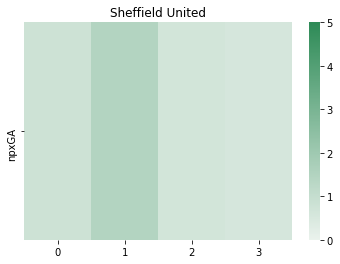

4


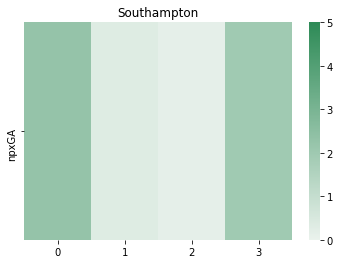

4


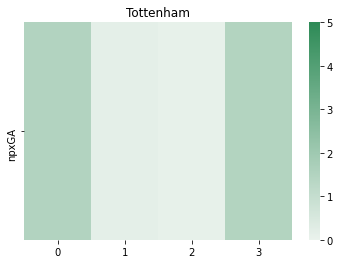

4


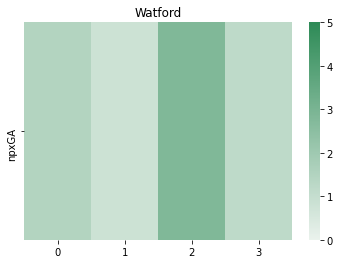

4


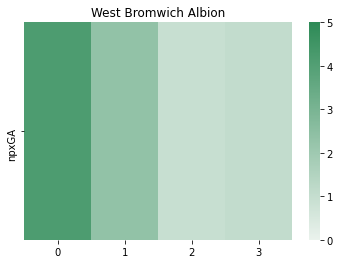

4


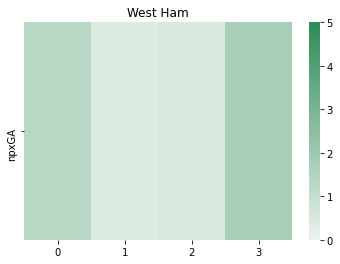

4


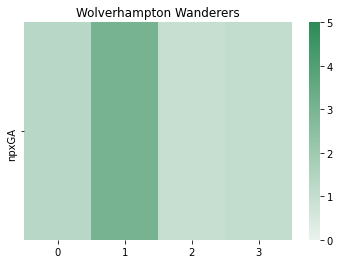

In [2]:
fpl = await get_fpl()
team_feature_names = ["npxGA"]
teams = get_teams(team_feature_names=team_feature_names, visualize=True)

In [3]:
player_feature_names = ["ict_index"]
players = await get_players(player_feature_names, visualize=False, num_players=590)

302 Bruno Miguel Borges Fernandes Midfielder 13 105 [['Wolverhampton Wanderers' 'Chelsea' 'Watford' 'Everton'
  'Manchester City' 'Tottenham' 'Sheffield United' 'Brighton'
  'Bournemouth' 'Aston Villa' 'Southampton' 'Crystal Palace' 'West Ham'
  'Leicester' 'Crystal Palace' 'Brighton' 'Tottenham' 'Newcastle United']]


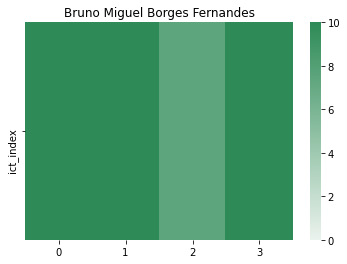

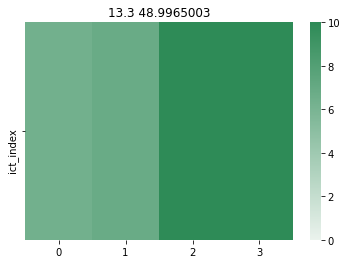

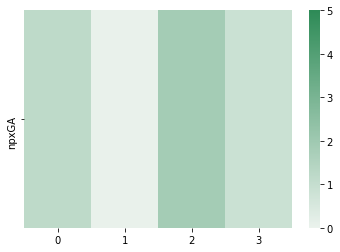

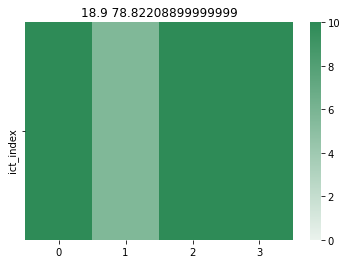

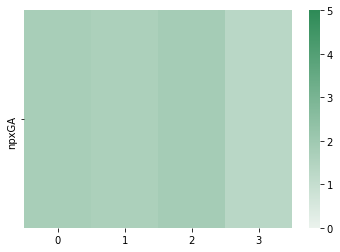

In [25]:
bruno = [player for player in players if "Bruno Miguel" in player.name][0]
bruno.visualize()
train_loader, test_loader= get_training_datasets([bruno], teams, visualize=False)
for player_features, opponent_features, total_points in train_loader:
    for player_feature, opponent_feature, total_point in zip(player_features, opponent_features, total_points):
        predicted_score = (player_feature * opponent_feature).sum()
        plt.title(f"{total_point} {predicted_score}")
        sns.heatmap(player_feature, yticklabels = player_feature_names, cmap = sns.light_palette("seagreen", as_cmap = True), vmin=0, vmax=1)
        plt.show()
        sns.heatmap(opponent_feature, yticklabels=team_feature_names,   cmap = sns.light_palette("seagreen", as_cmap = True), vmin=0, vmax=1)
        plt.show()